In [3]:
import pandas as pd, ipywidgets as widgets, numpy as np, matplotlib.pyplot as plt, io
from adjustText import adjust_text
raw_uploader, eln_uploader = widgets.FileUpload(multiple = False), widgets.FileUpload(multiple = False)
display("Upload iQue3 Data (csv)")
display(raw_uploader)
display("Upload ELN w/ Antibodies Sheet (xlsx)")
display(eln_uploader)

'Upload iQue3 Data (csv)'

FileUpload(value={}, description='Upload')

'Upload ELN w/ Antibodies Sheet (xlsx)'

FileUpload(value={}, description='Upload')

In [4]:
iquename, elnname = list(raw_uploader.value.keys())[0], list(eln_uploader.value.keys())[0]
iquename
iquedata = pd.read_csv(io.BytesIO(raw_uploader.value[iquename]['content']))
eln = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']))
ab_sheet = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']), sheet_name = "Antibody Plate Map")
iquedata

,Experiment,Analysis,Plate,Export Date and Time,Well ID,Row,Column,Well Type,Count of All Wells,Median BL1-H of transfected_binding,Median RL1-H of transfected_binding,Count of transfected_binding,Median BL1-H of untransfected_nonspecific,Median RL1-H of untransfected_nonspecific,Count of untransfected_nonspecific,Median BL1-H of singlets,Median RL1-H of singlets,Count of singlets
0,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,A01,A,1,FL,4469,30086.0,666708.0,33,15183.0,1302361.0,399,15800.0,1263677.0,500
1,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,B01,B,1,FL,5204,34608.0,1005294.0,69,15650.0,1412448.0,693,16409.5,1374862.5,872
2,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,C01,C,1,FL,5394,27611.0,299447.5,206,14995.0,601304.5,368,16324.0,332313.0,971
3,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,D01,D,1,FL,4253,28412.0,314210.0,91,14313.0,690449.5,262,15908.0,413483.5,564
4,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,E01,E,1,FL,2983,30956.5,776430.0,28,15856.0,4520464.0,632,16239.0,4340748.5,702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,D21,D,21,Negative,1290,27960.0,168249.0,1,12919.5,8476231.0,4,14383.0,18101.0,310
212,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,E21,E,21,Negative,1018,51776.0,514266.0,8,10650.0,471639.0,5,13798.0,22063.0,195
213,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,F21,F,21,Negative,1327,47148.5,486591.5,8,15474.5,946050.0,10,14993.5,15716.0,538
214,22_01_24 TREM1 Expi293 Top Hit Scale Up Primary,Analysis 1,TREM1 Expi293 Top Hit Scale Up Primary,1/25/22 11:59,G21,G,21,Negative,893,56755.5,524788.5,8,14439.5,6410252.5,4,14967.0,13837.0,173


In [5]:
data_cleaned = iquedata[["Plate", "Well ID", "Well Type", "Median RL1-H of singlets"]]
data_cleaned

,Plate,Well ID,Well Type,Median RL1-H of singlets
0,TREM1 Expi293 Top Hit Scale Up Primary,A01,FL,1263677.0
1,TREM1 Expi293 Top Hit Scale Up Primary,B01,FL,1374862.5
2,TREM1 Expi293 Top Hit Scale Up Primary,C01,FL,332313.0
3,TREM1 Expi293 Top Hit Scale Up Primary,D01,FL,413483.5
4,TREM1 Expi293 Top Hit Scale Up Primary,E01,FL,4340748.5
...,...,...,...,...
211,TREM1 Expi293 Top Hit Scale Up Primary,D21,Negative,18101.0
212,TREM1 Expi293 Top Hit Scale Up Primary,E21,Negative,22063.0
213,TREM1 Expi293 Top Hit Scale Up Primary,F21,Negative,15716.0
214,TREM1 Expi293 Top Hit Scale Up Primary,G21,Negative,13837.0


In [12]:
#Create a series with only the first (full length) population from plate, and another series with only those MFIs
#Separate n=1 and n=2 duplicates, average them and reset the indeces
full_length = data_cleaned[data_cleaned["Well Type"] == "FL"]
FL_MFI = full_length["Median RL1-H of singlets"]
firsts = FL_MFI.iloc[::2]
seconds = FL_MFI.iloc[1::2]
firsts.reset_index(inplace = True, drop = True)
seconds.reset_index(inplace = True, drop = True)
averageFL = firsts + seconds
averageFL = averageFL / 2

#averageFL

0     1319269.75
1      372898.25
2     4757008.25
3      391234.00
4      744040.50
5     1772805.75
6     2258192.50
7     1254322.50
8      648257.50
9      218912.75
10     174754.50
11    3399364.00
12    3606447.75
13    5111583.75
14     678522.00
15     380220.50
16     778767.00
17     168524.75
18     267949.00
19    2526219.75
20     784886.25
21    1941773.25
22     576787.25
23     404359.00
24     599732.50
25     968460.25
26    1193962.75
27    2097168.00
28    1560129.50
29    1644732.50
30    1270023.00
31     906797.75
32     554238.00
33     187278.50
34     237466.00
35     554712.25
Name: Median RL1-H of singlets, dtype: float64

In [13]:
#Do the same with the second population (ECD)
#Separate n=1 and n=2 duplicates, average them and reset the indeces
ECD = data_cleaned[data_cleaned["Well Type"] == "ECD"]
ECD_MFI = ECD["Median RL1-H of singlets"]
firsts = ECD_MFI.iloc[::2]
seconds = ECD_MFI.iloc[1::2]
firsts.reset_index(inplace = True, drop = True)
seconds.reset_index(inplace = True, drop = True)
averageECD = firsts + seconds
averageECD = averageECD / 2

#averageECD

0      740102.50
1      206269.75
2     2209106.50
3      585585.75
4      421260.00
5     1133520.50
6     1339572.75
7      932430.50
8      574318.50
9      103045.75
10     134924.00
11    1779805.00
12    1386749.75
13    1829380.00
14     149609.00
15      45845.00
16     416178.75
17     117572.50
18     209461.00
19     783389.75
20     106166.00
21     801203.00
22     425249.50
23     371996.25
24     622752.50
25     833112.00
26     988405.50
27    1122698.25
28     799781.50
29     977692.75
30     910413.25
31     560589.00
32     459502.00
33      20405.00
34     372806.00
35     374738.50
Name: Median RL1-H of singlets, dtype: float64

In [14]:
#Do the same with the Negative population (untransfected controls)
only_negative = data_cleaned[data_cleaned["Well Type"] == "Negative"]
negatives_MFI = only_negative["Median RL1-H of singlets"]
negatives_MFI.reset_index(inplace = True, drop = True)
firsts = negatives_MFI.iloc[::2]
seconds = negatives_MFI.iloc[1::2]
firsts.reset_index(inplace = True, drop = True)
seconds.reset_index(inplace = True, drop = True)
averageNegative = firsts + seconds
averageNegative = averageNegative / 2

#averageNegative

0      656407.75
1      290023.75
2     3433335.50
3      565003.50
4      460350.00
5     1272733.25
6     1264702.25
7      862217.25
8      770222.75
9      259767.25
10     217777.75
11    1878607.75
12    1311921.50
13    2467600.50
14     179004.00
15      58432.50
16     494752.25
17     156162.25
18     208091.00
19    1237946.75
20     148758.00
21     802352.75
22     454896.50
23     335288.50
24     877655.50
25    1022710.00
26    1244932.00
27    1416018.50
28     913127.25
29    1226108.00
30    1088678.00
31    1061989.25
32     716680.00
33      16776.50
34      18889.50
35      14517.50
Name: Median RL1-H of singlets, dtype: float64

In [35]:
#Create new DF for MFI ratios for full length(don't modify originals)
FL_MFIratios = averageFL / averageNegative
FL_MFIratio_sheet = full_length.copy()
FL_MFIratio_sheet = FL_MFIratio_sheet[::2]
FL_MFIratio_sheet.reset_index(inplace = True, drop = True)
FL_MFIratio_sheet["FL MFI Ratio"] = FL_MFIratios

#Create new DF for MFI ratios 
ECD_MFIratios = averageECD / averageNegative
ECD_MFIratio_sheet = ECD.copy()
ECD_MFIratio_sheet = ECD_MFIratio_sheet[::2]
ECD_MFIratio_sheet.reset_index(inplace = True, drop = True)
ECD_MFIratio_sheet["ECD MFI Ratio"] = ECD_MFIratios

MFIRatio_Antibody = pd.concat([FL_MFIratio_sheet, ECD_MFIratio_sheet, ab_sheet], axis = 1)
MFIRatio_Antibody_cleaned = MFIRatio_Antibody[["Plate", "Well ID", "FL MFI Ratio", "ECD MFI Ratio", "DNA", "Protein Concentration (ug/uL)"]]
MFIRatio_Antibody_cleaned.to_excel("MFI Ratio Antibody Match.xlsx")
SortByFLMFI = MFIRatio_Antibody_cleaned.sort_values(by="FL MFI Ratio", ascending = False)
SortByFLMFI

,Plate,Plate,Well ID,Well ID,FL MFI Ratio,ECD MFI Ratio,DNA,Protein Concentration (ug/uL)
35,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,G05,G13,38.209902,25.812881,TB440-2,0.180
34,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,E05,E13,12.571323,19.736150,TB440-1,0.090
33,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,C05,C13,11.163145,1.216285,MAB 1278,0.015
15,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,O02,O10,6.507004,0.784580,TB436-088,0.040
20,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,I03,I11,5.276262,0.713683,TB438-075,0.140
14,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,M02,M10,3.790541,0.835786,TB436-087,0.900
12,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,I02,I10,2.748981,1.057037,TB285-064,0.100
21,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,K03,K11,2.420099,0.998567,TB438-080,1.660
13,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,K02,K10,2.071479,0.741360,TB285-007,1.440
19,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,G03,G11,2.040653,0.632814,TB438-083,0.930


In [36]:
SortByECDMFI = MFIRatio_Antibody_cleaned.sort_values(by="ECD MFI Ratio", ascending = False)
SortByECDMFI

,Plate,Plate,Well ID,Well ID,FL MFI Ratio,ECD MFI Ratio,DNA,Protein Concentration (ug/uL)
35,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,G05,G13,38.209902,25.812881,TB440-2,0.180
34,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,E05,E13,12.571323,19.736150,TB440-1,0.090
33,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,C05,C13,11.163145,1.216285,MAB 1278,0.015
0,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,A01,A09,2.009833,1.127504,TB436-001,1.400
23,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,O03,O11,1.206003,1.109481,TB495_100,0.020
7,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,O01,O09,1.454764,1.081433,TB436-014,1.720
6,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,M01,M09,1.785553,1.059200,TB436-013,1.550
12,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,I02,I10,2.748981,1.057037,TB285-064,0.100
3,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,G01,G09,0.692445,1.036429,TB436-006,0.050
18,TREM1 Expi293 Top Hit Scale Up Primary,TREM1 Expi293 Top Hit Scale Up Primary,E03,E11,1.287653,1.006584,TB438-055,0.040


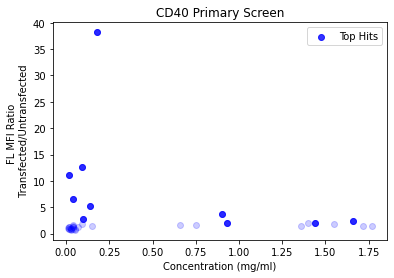

In [33]:
#Sort DF by highest MFI ratio (top hits)
SortByFLMFI = MFIRatio_Antibody_cleaned.sort_values(by="FL MFI Ratio", ascending = False)
Top10 = MFIRatio_Antibody_cleaned.nlargest(10, "FL MFI Ratio")
#Top10 = Top10.append(MFIRatio_Antibody_cleaned.loc[MFIRatio_Antibody_cleaned["DNA"] == "SC-175-017"])
fig, ax = plt.subplots()
ax.scatter(x = SortByFLMFI["Protein Concentration (ug/uL)"], y=SortByFLMFI["FL MFI Ratio"], alpha = .2, color = "blue")
ax.scatter(x = Top10["Protein Concentration (ug/uL)"], y = Top10["FL MFI Ratio"], alpha = .8, color = "blue", label = "Top Hits")
ax.set_title("CD40 Primary Screen")
ax.set_xlabel("Concentration (mg/ml)")
ax.set_ylabel("FL MFI Ratio \n Transfected/Untransfected")
ax.legend()

# texts = []
# for row in Top10.itertuples(index = False):
#     ab, conc, MFI = row[4], row[5], row[3]
#     ax.annotate(row[4], xy = (conc, MFI), textcoords = "offset points", xytext = (8, -2), ha ='left')
#     #texts.append(plt.text(ab, conc, MFI))